<a href="https://colab.research.google.com/github/AlishaJoy/SAR_de-speckling_angstromers/blob/main/Kiran_Copy_of_File1_SAR2SAR_GRD_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SAR2SAR: a self-supervised despeckling algorithm for SAR images

Please note that the training set is only composed of GRD SAR images, thus this testing code is specific to this data.

Resources
Paper [link text](https://arxiv.org/abs/2006.15037)
To cite the article:



# **0. Enable GPU and save copy on Drive to enable editing**
Runtime -> Change runtime type -> Hardware accelerator: GPU

File -> Save a copy in Drive

# **1. Download network weights and code**

In [1]:
!wget https://gitlab.telecom-paris.fr/ring/SAR2SAR/-/raw/master/network_weights/SAR2SAR-GRD-test.zip
!unzip /content/SAR2SAR-GRD-test.zip

--2024-10-19 07:38:44--  https://gitlab.telecom-paris.fr/ring/SAR2SAR/-/raw/master/network_weights/SAR2SAR-GRD-test.zip
Resolving gitlab.telecom-paris.fr (gitlab.telecom-paris.fr)... 137.194.22.227, 2a04:8ec0:0:a::89c2:16e3
Connecting to gitlab.telecom-paris.fr (gitlab.telecom-paris.fr)|137.194.22.227|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://gitlab.telecom-paris.fr/ring/sar2sar/-/raw/master/network_weights/SAR2SAR-GRD-test.zip [following]
--2024-10-19 07:38:45--  https://gitlab.telecom-paris.fr/ring/sar2sar/-/raw/master/network_weights/SAR2SAR-GRD-test.zip
Reusing existing connection to gitlab.telecom-paris.fr:443.
HTTP request sent, awaiting response... 200 OK
Length: 25418317 (24M) [application/octet-stream]
Saving to: ‘SAR2SAR-GRD-test.zip’

SAR2SAR-GRD-test.zi 100%[===================>]  24.24M  7.03MB/s    in 3.4s    

2024-10-19 07:38:49 (7.03 MB/s) - ‘SAR2SAR-GRD-test.zip’ saved [25418317/25418317]

Archive:  /content/SAR

# **# 2. Install compatible version of tensorflow**
### Note: This whole set of code blocks will always provide a text box asking yes or no question, so always give yes and make sure to be aware or else the code execution will not proceed

In [2]:
!wget https://repo.anaconda.com/miniconda/Miniconda3-py38_4.12.0-Linux-x86_64.sh
!chmod +x Miniconda3-py38_4.12.0-Linux-x86_64.sh
!bash ./Miniconda3-py38_4.12.0-Linux-x86_64.sh -b -f -p /usr/local


--2024-10-19 07:45:19--  https://repo.anaconda.com/miniconda/Miniconda3-py38_4.12.0-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.32.241, 104.16.191.158, 2606:4700::6810:bf9e, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.32.241|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 76120962 (73M) [application/x-sh]
Saving to: ‘Miniconda3-py38_4.12.0-Linux-x86_64.sh’

Miniconda3-py38_4.1 100%[===================>]  72.59M  28.3MB/s    in 2.6s    

2024-10-19 07:45:22 (28.3 MB/s) - ‘Miniconda3-py38_4.12.0-Linux-x86_64.sh’ saved [76120962/76120962]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: / - done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - _openmp_mutex==4.5=1_gnu
    - brotlipy==0.7.0=py38h27cfd23_1003
    - ca-certificates==2022.3.29=h06a4308_1
    - certifi==2021.10.8=py38h06a4308_2
    - cffi==1.15.0=py38hd667e15_1
    - c

In [3]:
import sys
sys.path.append('/usr/local/lib/python3.8/site-packages/')


In [4]:
!conda --version


conda 4.12.0


In [5]:
!conda create -n myenv python=3.6 -y


Solving environment: - failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: \ | / - \ | / - \ | / - \ | / done


==> WARNING: A newer version of conda exists. <==
  current version: 4.12.0
  latest version: 24.9.2

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /usr/local/envs/myenv

  added / updated specs:
    - python=3.6


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _openmp_mutex-5.1          |            1_gnu          21 KB
    ca-certificates-2024.9.24  |       h06a4308_0         130 KB
    certifi-2021.5.30          |   py36h06a4308_0         139 KB
    ld_impl_linux-64-2.40      |       h12ee557_0         710 KB
    libgcc-ng-11.2.0           |       h1234567_1         5.3 MB
    libgomp-11.2.0             |      

In [15]:
%%shell
eval "$(conda shell.bash hook)"
conda activate myenv
pip3 install tensorflow-gpu==1.13.1

In [17]:
!conda install -n myenv cudatoolkit=10.0 cudnn=7.6.5 -c conda-forge -y


Solving environment: - \ done


==> WARNING: A newer version of conda exists. <==
  current version: 4.12.0
  latest version: 24.9.2

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /usr/local/envs/myenv

  added / updated specs:
    - cudatoolkit=10.0
    - cudnn=7.6.5


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2024.8.30  |       hbcca054_0         155 KB  conda-forge
    certifi-2016.9.26          |           py36_0         217 KB  conda-forge
    cudatoolkit-10.0.130       |      h8c5a6a4_10       336.3 MB  conda-forge
    cudnn-7.6.5                |       cuda10.0_0       165.0 MB
    openssl-1.1.1l             |       h7f98852_0         2.1 MB  conda-forge
    ------------------------------------------------------------
                                           Total:       503.7

In [19]:
!conda install -n myenv pillow
!conda install -n myenv scipy

Solving environment: / - failed with initial frozen solve. Retrying with flexible solve.
Solving environment: | / - failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: | / - \ | / - \ | / - done


==> WARNING: A newer version of conda exists. <==
  current version: 4.12.0
  latest version: 24.9.2

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /usr/local/envs/myenv

  added / updated specs:
    - pillow


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    freetype-2.12.1            |       h4a9f257_0         626 KB
    jpeg-9e                    |       h5eee18b_3         262 KB
    lcms2-2.12                 |       h3be6417_0         312 KB
    lerc-3.0                   |       h295c915_0         196 KB
    libdeflate-1.17   

# **3. Test on real data**
Some GRD images in amplitude format can be found in the folder /content/SAR2SAR-GRD-test/test_data/

To test on custom data, upload your single channel GRD images in a numpy array with shape [ydim, xdim] in the folder /content/SAR2SAR-GRD-test/test_data/

Results are stored in /content/test

At each time a test is run, clean the /content/test directory otherwise the results will be overwritten.

In [20]:
!source activate myenv && python /content/SAR2SAR-GRD-test/main.py

/usr/local/envs/myenv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/envs/myenv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/envs/myenv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/envs/myenv/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.

When image dimension exeeds 256, the U-Net is scanned over the image with a default stride of 64 pixels. To change it to a custom value, run the cell below (here it is set to 32, allowing more quality at the cost of a greater runtime)

In [ ]:
!python /content/SAR2SAR-GRD-test/main.py --stride_size=32

In [25]:
pip install numpy


     |████████████████████████████████| 17.3 MB 11.3 MB/s 


# **Results are stored in /content/test**

At each time a test is run, clean the /content/test directory otherwise the results will be overwritten.

# **denoised_Alpes_21**

Shape of the array: (1076, 1076)
Content of the array: [[ 63.51406   68.7909    73.660675 ...  72.009514  71.41248   68.15305 ]
 [ 65.64769   69.99478   73.44539  ...  73.05245   72.00244   70.74162 ]
 [ 69.8287    69.32673   72.99347  ...  73.31152   72.492805  73.10271 ]
 ...
 [115.5618   146.15836  216.34842  ...  71.69513   83.86719   97.738014]
 [121.325165 158.98177  199.24907  ...  71.10497   81.90988   93.95519 ]
 [146.36746  179.71579  205.20116  ...  77.694176  85.28619   90.6071  ]]


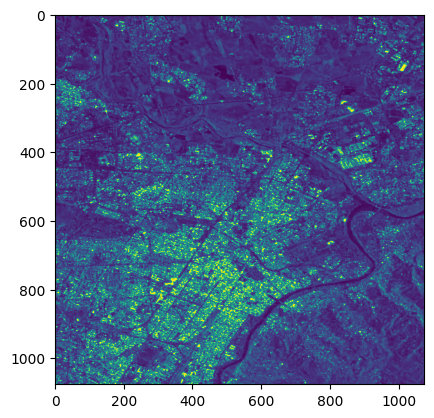

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


data = np.load('/content/test/denoised_Alpes1_21.npy')


print("Shape of the array:", data.shape)
print("Content of the array:", data)


image_path = '/content/test/denoised_Alpes1_21.png'
img = mpimg.imread(image_path)


plt.imshow(img)
plt.axis('on')
plt.show()


# **denoised Damoh 21**

Shape of the array: (1026, 1026)
Content of the array: [[107.96567 106.48438 108.95865 ... 129.24596 150.67372 168.09349]
 [111.48692 114.65844 119.18908 ... 133.09088 147.34966 163.22552]
 [112.30487 119.01756 130.13684 ... 136.63597 146.70396 152.60211]
 ...
 [157.96811 152.20837 153.17175 ...  89.5393   87.66395  91.97798]
 [144.29515 145.59688 151.05673 ...  92.27599 101.96396 107.24241]
 [131.96188 140.34132 146.4659  ...  96.27477 108.41841 112.16486]]


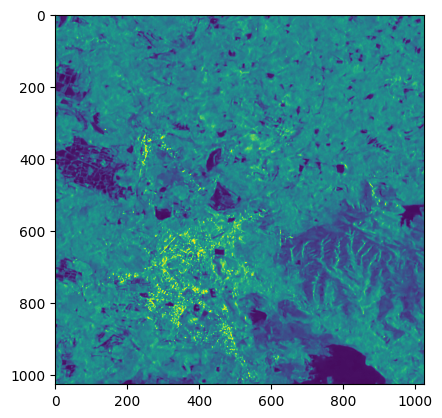

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


data = np.load('/content/test/denoised_Damoh_21.npy')


print("Shape of the array:", data.shape)
print("Content of the array:", data)


image_path = '/content/test/denoised_Damoh_21.png'
img = mpimg.imread(image_path)


plt.imshow(img)
plt.axis('on')
plt.show()

# **denoised DesMoines 21**

Shape of the array: (2143, 2795)
Content of the array: [[ 97.7286    92.66436   88.02628  ... 113.556526 123.36041  124.8499  ]
 [102.986374 102.45524   93.382866 ... 114.0137   117.11338  117.24515 ]
 [104.394516 106.19879  105.879135 ... 120.082886 117.27266  115.13389 ]
 ...
 [133.09862  130.92719  124.75932  ... 112.797    114.29011  113.77267 ]
 [130.44724  127.86525  125.37142  ... 108.31062  110.82808  107.931786]
 [126.63315  130.50534  125.502045 ... 102.201996 102.71743   99.32546 ]]


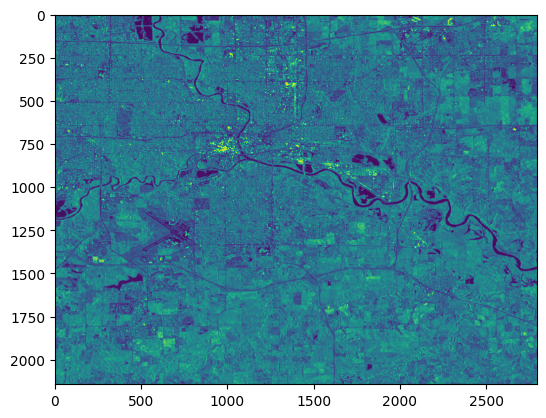

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


data = np.load('/content/test/denoised_DesMoines_21.npy')


print("Shape of the array:", data.shape)
print("Content of the array:", data)


image_path = '/content/test/denoised_DesMoines_21.png'
img = mpimg.imread(image_path)


plt.imshow(img)
plt.axis('on')
plt.show()

# **denoised Rennes 26**

Shape of the array: (1931, 1159)
Content of the array: [[ 70.25546   70.516914  75.79321  ...  64.85162   64.05306   62.884594]
 [ 66.91196   68.419014  74.304695 ...  62.778828  62.73933   63.209934]
 [ 64.65148   65.1057    71.40254  ...  60.97065   60.941345  61.60193 ]
 ...
 [114.89762  125.79646  130.86316  ...  65.5344    58.88107   58.204567]
 [105.026924 105.1102   101.41419  ...  66.353325  57.335045  54.25711 ]
 [ 89.59131   96.46704   90.351006 ...  55.885395  49.085186  46.263428]]


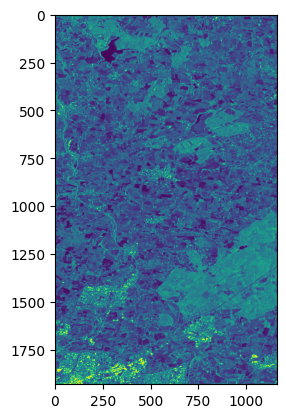

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

data = np.load('/content/test/denoised_Rennes_26.npy')

print("Shape of the array:", data.shape)
print("Content of the array:", data)

image_path = '/content/test/denoised_Rennes_26.png'
img = mpimg.imread(image_path)

plt.imshow(img)
plt.axis('on')
plt.show()


# **noisy_Alphes1_21**

Shape of the array: (1076, 1076)
Content of the array: [[ 42.000008  67.00002   87.99992  ...  67.99997   76.99999   48.000015]
 [ 51.999996  56.999966  74.99997  ...  71.99997   71.000015  65.99998 ]
 [ 73.000015  73.000015  82.999985 ...  73.000015  73.000015  82.999985]
 ...
 [104.000015 104.000015 196.9999   ...  42.99998   80.00001  110.99996 ]
 [107.99996  162.99982  206.99982  ...  59.999977  76.99999  106.99987 ]
 [138.       208.99991  236.99988  ...  84.99996   94.99999   93.999916]]


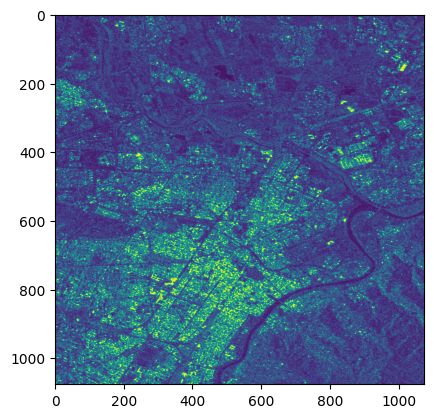

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

data = np.load('/content/test/noisy_Alpes1_21.npy')

print("Shape of the array:", data.shape)
print("Content of the array:", data)

image_path = '/content/test/noisy_Alpes1_21.png'
img = mpimg.imread(image_path)

plt.imshow(img)
plt.axis('on')
plt.show()


# **noisy_Damoh_21**

Shape of the array: (1026, 1026)
Content of the array: [[110.000015 110.99996   96.       ... 107.99996  144.       201.00014 ]
 [107.99996   89.99996  110.99996  ... 133.99997  160.9999   214.99997 ]
 [104.999985  99.99991  150.99995  ... 146.99988  165.00002  180.99995 ]
 ...
 [170.00002  138.       165.00002  ...  67.99997   54.999977  84.99996 ]
 [139.       110.000015 149.99988  ...  71.99997  102.99995  133.99997 ]
 [106.99987  137.00002  157.99991  ...  96.       123.99992  146.99988 ]]


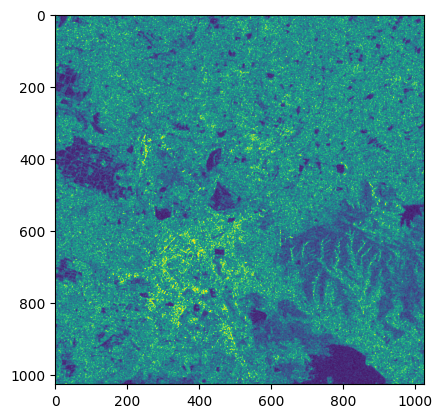

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

data = np.load('/content/test/noisy_Damoh_21.npy')

print("Shape of the array:", data.shape)
print("Content of the array:", data)

image_path = '/content/test/noisy_Damoh_21.png'
img = mpimg.imread(image_path)

plt.imshow(img)
plt.axis('on')
plt.show()

# **noisy_DesMoines_21**

Shape of the array: (2143, 2795)
Content of the array: [[ 92.999985  92.999985  81.999916 ... 101.99995  115.00001  139.99992 ]
 [116.00004  109.000015  81.999916 ...  96.        89.99996  104.999985]
 [122.99988  116.00004  104.000015 ... 125.00001  105.99997   75.99992 ]
 ...
 [121.99998  138.       142.00009  ...  96.       149.99988  144.99992 ]
 [101.99995  101.99995  105.99997  ...  76.99999  131.9999    89.99996 ]
 [116.00004  166.99992  152.99992  ...  73.99998   98.999954  92.999985]]


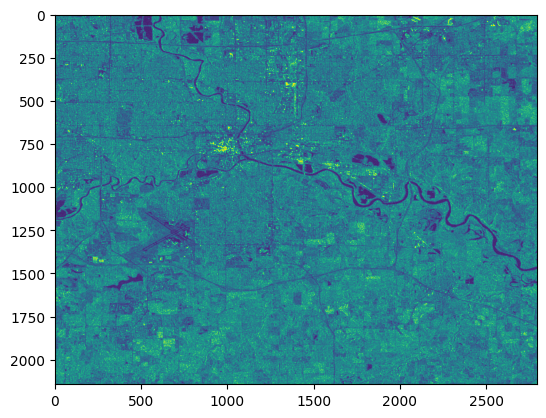

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

data = np.load('/content/test/noisy_DesMoines_21.npy')

print("Shape of the array:", data.shape)
print("Content of the array:", data)

image_path = '/content/test/noisy_DesMoines_21.png'
img = mpimg.imread(image_path)

plt.imshow(img)
plt.axis('on')
plt.show()

# **noisy_Rennes_26**

Shape of the array: (1931, 1159)
Content of the array: [[ 67.99997   56.999966  65.99998  ...  62.999966  62.999966  55.999992]
 [ 62.999966  67.00002   59.000004 ...  46.999992  71.000015  67.99997 ]
 [ 59.000004  61.999992  61.999992 ...  56.999966  59.999977  52.99997 ]
 ...
 [118.99998  118.99998  144.99992  ...  63.999943  46.999992  59.999977]
 [105.99997   92.999985  90.99999  ...  89.99996   71.99997   46.999992]
 [ 73.000015 106.99987   98.000015 ...  57.999996  34.000008  34.000008]]


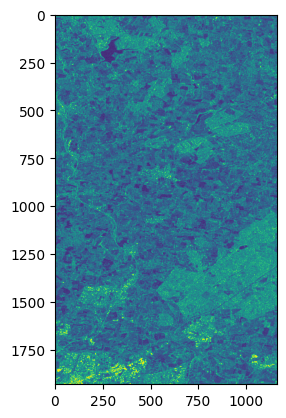

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

data = np.load('/content/test/noisy_Rennes_26.npy')

print("Shape of the array:", data.shape)
print("Content of the array:", data)

image_path = '/content/test/noisy_Rennes_26.png'
img = mpimg.imread(image_path)

plt.imshow(img)
plt.axis('on')
plt.show()